Importing libraries & functions

In [27]:

import matplotlib.pyplot as pltimport pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


Importing dataset

In [3]:
data=pd.read_excel('/content/a_Dataset_CreditScoring.xlsx')
print(data.head())

   TARGET    ID  DerogCnt  CollectCnt  ...  TLOpenPct  TLBadDerogCnt  TLDel60Cnt24  TLOpen24Pct
0       1   582         3           3  ...     0.2083              4             4       0.0000
1       1   662        15           9  ...     1.0000             12             0       1.0000
2       1   805         0           0  ...     0.7308              1             1       0.5263
3       1  1175         8           5  ...     0.7500              7             1       1.3333
4       1  1373         3           1  ...     0.1429              3             1       0.0000

[5 rows x 30 columns]


Data Preparation

In [4]:
data.shape

(3000, 30)

In [5]:
data.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,TLCnt24,TLCnt,TLSum,TLMaxSum,TLSatCnt,TLDel60Cnt,TLBadCnt24,TL75UtilCnt,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,0,0,0,5.0,19410.0,21147.0,16.0,2,1,3.0,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,0,0,1,1.0,16776.0,20971.0,1.0,0,0,1.0,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,0,2,10,19.0,16903.0,47593.0,21.0,1,1,4.0,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,0,2,4,3.0,18339.0,20093.0,1.0,1,0,2.0,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,0,0,0,1.0,2327.0,1860.0,3.0,4,1,1.0,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [6]:
#Dropping customer ID column from dataset
data=data.drop("ID",axis=1)
data.shape

(3000, 29)

data=data.fillna(data.mean())

In [7]:
#Exploring missing values
data.isna().sum()

,0
TARGET,0
DerogCnt,0
CollectCnt,0
BanruptcyInd,0
InqCnt06,0
InqTimeLast,188
InqFinanceCnt24,0
TLTimeFirst,0
TLTimeLast,0
TLCnt03,0


In [8]:
#Filling missing values with mean
data=data.fillna(data.mean())

In [9]:
#Explore missing values post missing value fix
data.isna().sum()

,0
TARGET,0
DerogCnt,0
CollectCnt,0
BanruptcyInd,0
InqCnt06,0
InqTimeLast,0
InqFinanceCnt24,0
TLTimeFirst,0
TLTimeLast,0
TLCnt03,0


Train Test Split

In [10]:
y=data.iloc[:,0].values
x=data.iloc[:,1:28].values

In [12]:
#Splitting dataset into training and test(in ration 80:20)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

Risk Model building

In [15]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

Model performance

In [17]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Now you can use confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[466  16]
 [ 98  20]]


In [21]:
print(accuracy_score(y_test,y_pred))

0.81


In [23]:
predictions=classifier.predict_proba(X_test)
predictions

array([[0.79161742, 0.20838258],
       [0.92761911, 0.07238089],
       [0.81034185, 0.18965815],
       ...,
       [0.51917675, 0.48082325],
       [0.97475054, 0.02524946],
       [0.98747325, 0.01252675]])

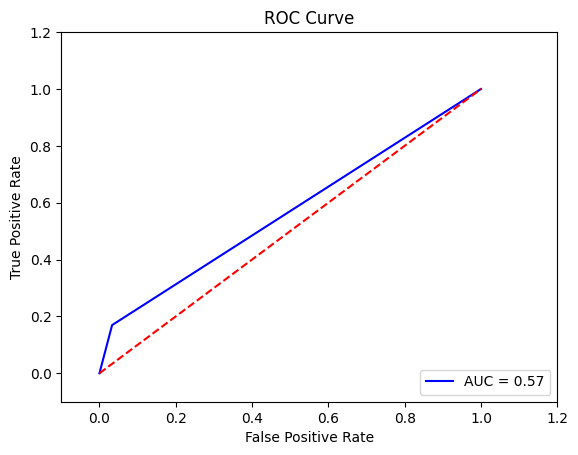

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc =  roc_auc_score(y_test,y_pred)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
#Train Logistic Regression (It already done)
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
y_pred_lr = classifier_lr.predict(X_test)

# Step 3: Train Decision Tree
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_dt.fit(X_train, y_train)
y_pred_dt = classifier_dt.predict(X_test)

# Step 4: Train Random Forest
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)

# Step 5: Train Support Vector Machine
classifier_svm = SVC(probability=True)  # probability=True needed for ROC AUC score
classifier_svm.fit(X_train, y_train)
y_pred_svm = classifier_svm.predict(X_test)

# Step 6: Compare accuracy scores
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))


Logistic Regression Accuracy:  0.81
Decision Tree Accuracy:  0.7633333333333333
Random Forest Accuracy:  0.8066666666666666
SVM Accuracy:  0.8033333333333333


In [32]:
# Define a function to calculate and print evaluation metrics
def evaluate_model(y_true, y_pred, y_prob=None):
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true, y_pred))
    print("Recall: ", recall_score(y_true, y_pred))
    print("F1-Score: ", f1_score(y_true, y_pred))
    if y_prob is not None:
        print("AUC-ROC: ", roc_auc_score(y_true, y_prob))

#  Evaluate each model
# Logistic Regression
evaluate_model(y_test, y_pred_lr, classifier_lr.predict_proba(X_test)[:, 1])

# Decision Tree
evaluate_model(y_test, y_pred_dt)

# Random Forest
evaluate_model(y_test, y_pred_rf, classifier_rf.predict_proba(X_test)[:, 1])

# SVM
evaluate_model(y_test, y_pred_svm, classifier_svm.predict_proba(X_test)[:, 1])


Accuracy:  0.81
Precision:  0.5555555555555556
Recall:  0.1694915254237288
F1-Score:  0.2597402597402597
AUC-ROC:  0.8038364160630143
Accuracy:  0.7633333333333333
Precision:  0.38461538461538464
Recall:  0.3389830508474576
F1-Score:  0.36036036036036034
Accuracy:  0.8066666666666666
Precision:  0.5384615384615384
Recall:  0.11864406779661017
F1-Score:  0.19444444444444445
AUC-ROC:  0.7901926999085731
Accuracy:  0.8033333333333333
Precision:  0.5
Recall:  0.01694915254237288
F1-Score:  0.03278688524590164
AUC-ROC:  0.7222730149799563


In [33]:
# Feature importance from Random Forest
importances_rf = classifier_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

# Print feature rankings
print("Feature Ranking (Random Forest):")
for i in range(X_train.shape[1]):
    print(f"{i + 1}. Feature {indices_rf[i]} (Importance: {importances_rf[indices_rf[i]]})")

# Coefficients from Logistic Regression
coefficients_lr = classifier_lr.coef_[0]
print("Logistic Regression Coefficients:")
for i, coef in enumerate(coefficients_lr):
    print(f"Feature {i + 1}: {coef}")


Feature Ranking (Random Forest):
1. Feature 19 (Importance: 0.07962458331695843)
2. Feature 20 (Importance: 0.0746960958753153)
3. Feature 6 (Importance: 0.07120157198699965)
4. Feature 12 (Importance: 0.055056684140539)
5. Feature 13 (Importance: 0.05281198412065406)
6. Feature 24 (Importance: 0.04965289683083547)
7. Feature 14 (Importance: 0.04855170688456968)
8. Feature 7 (Importance: 0.043235116511469406)
9. Feature 5 (Importance: 0.04091557758666129)
10. Feature 3 (Importance: 0.040241892771623655)
11. Feature 21 (Importance: 0.03836138462247493)
12. Feature 26 (Importance: 0.03776002678233123)
13. Feature 17 (Importance: 0.03458637216622961)
14. Feature 11 (Importance: 0.033510092770352606)
15. Feature 10 (Importance: 0.03346022532013298)
16. Feature 18 (Importance: 0.033109157811907285)
17. Feature 15 (Importance: 0.03104534719684022)
18. Feature 25 (Importance: 0.03013415680293455)
19. Feature 23 (Importance: 0.02965188308760031)
20. Feature 4 (Importance: 0.028503824376044443)

In [34]:
# Import k-Fold Cross-Validation
from sklearn.model_selection import cross_val_score

# Step 12: Perform cross-validation on Logistic Regression
cv_scores_lr = cross_val_score(classifier_lr, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression 5-Fold CV Accuracy: ", np.mean(cv_scores_lr))

# Step 13: Perform cross-validation on Random Forest
cv_scores_rf = cross_val_score(classifier_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest 5-Fold CV Accuracy: ", np.mean(cv_scores_rf))


Logistic Regression 5-Fold CV Accuracy:  0.85125
Random Forest 5-Fold CV Accuracy:  0.8416666666666668


In [35]:
# Re-train Logistic Regression with class weights for imbalanced data
classifier_lr_weighted = LogisticRegression(class_weight='balanced')
classifier_lr_weighted.fit(X_train, y_train)
y_pred_lr_weighted = classifier_lr_weighted.predict(X_test)

# Step 15: Evaluate performance
evaluate_model(y_test, y_pred_lr_weighted, classifier_lr_weighted.predict_proba(X_test)[:, 1])


Accuracy:  0.7516666666666667
Precision:  0.418848167539267
Recall:  0.6779661016949152
F1-Score:  0.517799352750809
AUC-ROC:  0.8016386525072086


In [ ]:
from google.colab import drive
drive.mount('/content/drive')